In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
dataset= pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#Import Label ENCODING Technique

In [4]:
from sklearn import preprocessing
label_encoder =preprocessing.LabelEncoder()
dataset['State']=label_encoder.fit_transform(dataset['State'])
dataset['State'].unique()

array([2, 0, 1])

In [5]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [6]:
dataset.shape

(50, 5)

<function matplotlib.pyplot.show(*args, **kw)>

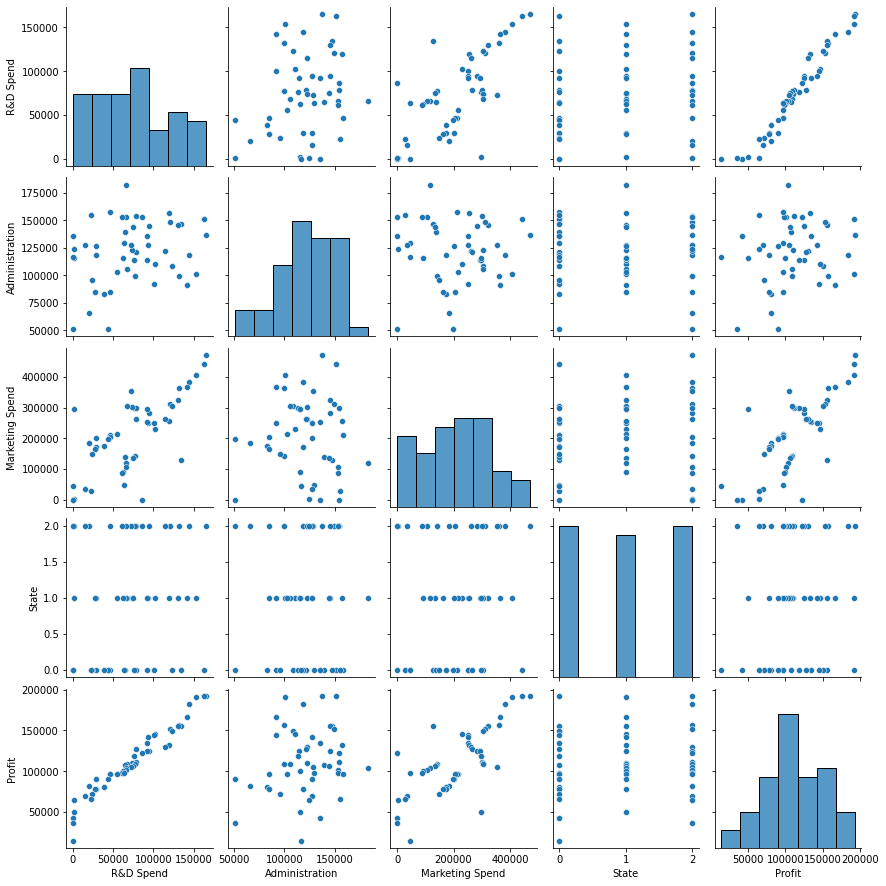

In [7]:
sns.pairplot(dataset)
plt.show

In [8]:
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.20,random_state= 0)

Training the Multiple linear regression model on training set

In [10]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train,Y_train)

LinearRegression()

Predicting the Test set results

In [11]:
Y_pred=mlr.predict(X_test)
np.set_printoptions(precision=2)
print(Y_pred)

[103959.41 132398.73 133529.04  72958.28 179534.79 115533.63  67476.96
  98504.36 114789.16 168972.22]


In [12]:
c=mlr.intercept_
print(c)

42658.087123248944


In [13]:
print(mlr.coef_)

[7.77e-01 3.02e-02 3.49e-02 3.16e+02]


In [14]:
res=mlr.predict([[	165349.20,136897.80,471784.10	,2]])
res

array([192416.49])

Visualization of Multiple Linear Regression Model

EVALUATION

1.RMSE

In [15]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error=",rmse)

Root Mean Squared Error= 8855.157941675205


2.R^2 VALUE

In [16]:
#Method 1
SS_Error= sum((Y_test-Y_pred)**2)
SS_Total=sum((Y_test-np.mean(Y_test))**2)
r_squared=1-(float(SS_Error))/(SS_Total)
print("r_squared value is :",r_squared)

r_squared value is : 0.9386861070938133


In [17]:
#Method 2 
from sklearn.metrics import r2_score
r_squared=r2_score(Y_test,Y_pred)
print("r square value is :",r_squared)

r square value is : 0.9386861070938133


ADJ. R^2 VALUE

In [18]:
#Method1 
adjusted_r_squared= 1 -(1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("adjusted r square value:",adjusted_r_squared)

adjusted r square value: 0.9332359832799301


In [19]:
#Methode2 
n=len(dataset)
p=len(dataset.columns)-1
adj_r=1-(1-r_squared)*(n-1)/(n-p-1)
print("adjusted r squared value is :",adj_r)

adjusted r squared value is : 0.9332359832799301


R-squared and adjusted R-squared using statsmodels

In [20]:
import statsmodels.api as sm
multiple_reg=sm.OLS(Y,X).fit()
multiple_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              928.1
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                    2.47e-43
Time:                        08:40:47   Log-Likelihood:                         -545.17
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      46   BIC:                                      1106.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7169      0.065     11.054      0.000       0.586       0.847
x2             0.3125      0.034      9.139      0.000       0.244       0.381
x3             0.0797      0.022      3.609      0.001       0.035       0.124
x4          2531.8174   2309.786      1.096      0.279   -2117.541    7181.176
==============================================================================
Omnibus:                        1.495   Durbin-Watson:                   1.290
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                1.323
Skew:                          -0.245   Prob(JB):                        0.516
Kurtosis:                       2.371   Cond. No.                     3.32e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""